In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


from tensorflow.keras.layers import Input, Dense, concatenate, LSTM, Bidirectional, Dropout, GRU
from tensorflow.keras.models import Model
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)


In [2]:
df_dynamic = pd.read_csv('../treated_data/df_dynamic.csv', index_col=0)
df_static = pd.read_csv('../treated_data/df_static.csv',index_col=0).iloc[:,:1]

/home/mateus/anaconda3/envs/home-credit/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
X_train, X_test, y_train, y_test  = train_test_split(df_static.index ,df_static.TARGET, test_size=0.33, random_state=42, shuffle=True)

In [4]:
X_dynamic_train = df_dynamic.loc[X_train].reset_index()
X_dynamic_train = X_dynamic_train.fillna(0)
X_dynamic_train = X_dynamic_train.pivot_table(values=list(set(X_dynamic_train.columns)-set(['SK_ID_PREV', 'MONTHS_BALANCE','SK_ID_CURR'])), index='SK_ID_CURR', columns='MONTHS_BALANCE',aggfunc='sum', fill_value=0).loc[X_train].values
X_dynamic_train = X_dynamic_train.reshape((33265,97,57), order = 'F')

In [5]:
X_dynamic_test = df_dynamic.loc[X_test].reset_index()
X_dynamic_test = X_dynamic_test.fillna(0)
X_dynamic_test = X_dynamic_test.pivot_table(values=list(set(X_dynamic_test.columns)-set(['SK_ID_PREV', 'MONTHS_BALANCE','SK_ID_CURR'])), index='SK_ID_CURR', columns='MONTHS_BALANCE',aggfunc='sum', fill_value=0).loc[X_test].values
X_dynamic_test = X_dynamic_test.reshape((16385,97,57), order = 'F')

In [6]:
scalers = {}
for i in range(X_dynamic_train.shape[2]):
    scalers[i] = MinMaxScaler()
    X_dynamic_train[:, :, i] = scalers[i].fit_transform(X_dynamic_train[:, :, i]) 

for i in range(X_dynamic_test.shape[2]):
    X_dynamic_test[:, :, i] = scalers[i].transform(X_dynamic_test[:, :, i]) 

In [11]:
x_in_dy = Input(shape=(36,57))

out = LSTM(50, return_sequences=False)(x_in_dy)
# x_dy = GRU(100, return_sequences=True)(x_dy)
out = Dropout(0.2)(out)
# x_dy = GRU(30, return_sequences=False)(x_dy)


out = Dense(20, activation='relu')(out)
out = Dense(10, activation='relu')(out)
# out = Dropout(0.2)(out)
out = Dense(1, activation='sigmoid')(out)


model1 = Model(x_in_dy, out)

In [12]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
m = tf.keras.metrics.AUC()

In [ ]:
model1.compile(optimizer=opt, 
              loss = 'binary_crossentropy',
              metrics=[m])


history = model1.fit(X_dynamic_train[:,-36:,:], y_train,
                     validation_data=(X_dynamic_test[:,-36:,:], y_test),
                    epochs=1000, batch_size= 312)



Epoch 1/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.6935 - auc_1: 0.4970 - val_loss: 0.6931 - val_auc_1: 0.4996
Epoch 2/1000
107/107 [==============================] - 1s 13ms/step - loss: 0.6933 - auc_1: 0.5030 - val_loss: 0.6934 - val_auc_1: 0.5000
Epoch 3/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6934 - auc_1: 0.4979 - val_loss: 0.6931 - val_auc_1: 0.5023
Epoch 4/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6934 - auc_1: 0.4956 - val_loss: 0.6931 - val_auc_1: 0.4997
Epoch 5/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6933 - auc_1: 0.5020 - val_loss: 0.6932 - val_auc_1: 0.5000
Epoch 6/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6933 - auc_1: 0.5021 - val_loss: 0.6931 - val_auc_1: 0.4995
Epoch 7/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6932 - auc_1: 0.5049 - val_loss: 0.6933 - val_auc_1: 0.5016
Epoch 8/1000
107/107 [==========

Epoch 60/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.6931 - auc_1: 0.5051 - val_loss: 0.6932 - val_auc_1: 0.5023
Epoch 61/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6932 - auc_1: 0.5021 - val_loss: 0.6931 - val_auc_1: 0.5028
Epoch 62/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6932 - auc_1: 0.5021 - val_loss: 0.6931 - val_auc_1: 0.5066
Epoch 63/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6932 - auc_1: 0.5000 - val_loss: 0.6931 - val_auc_1: 0.5050
Epoch 64/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6931 - auc_1: 0.5022 - val_loss: 0.6931 - val_auc_1: 0.5068
Epoch 65/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6932 - auc_1: 0.5005 - val_loss: 0.6931 - val_auc_1: 0.5037
Epoch 66/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.6932 - auc_1: 0.4996 - val_loss: 0.6931 - val_auc_1: 0.5097
Epoch 67/1000
107/107 [====

Epoch 119/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6932 - auc_1: 0.5001 - val_loss: 0.6930 - val_auc_1: 0.5084
Epoch 120/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6930 - auc_1: 0.5034 - val_loss: 0.6930 - val_auc_1: 0.5085
Epoch 121/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6930 - auc_1: 0.5064 - val_loss: 0.6930 - val_auc_1: 0.5098
Epoch 122/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6930 - auc_1: 0.5080 - val_loss: 0.6932 - val_auc_1: 0.5104
Epoch 123/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6931 - auc_1: 0.5001 - val_loss: 0.6929 - val_auc_1: 0.5101
Epoch 124/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6932 - auc_1: 0.5022 - val_loss: 0.6929 - val_auc_1: 0.5105
Epoch 125/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6930 - auc_1: 0.5067 - val_loss: 0.6929 - val_auc_1: 0.5108
Epoch 126/1000
107/1

107/107 [==============================] - 1s 7ms/step - loss: 0.6930 - auc_1: 0.5044 - val_loss: 0.6926 - val_auc_1: 0.5194
Epoch 178/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6928 - auc_1: 0.5107 - val_loss: 0.6927 - val_auc_1: 0.5184
Epoch 179/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.6928 - auc_1: 0.5125 - val_loss: 0.6926 - val_auc_1: 0.5188
Epoch 180/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.6928 - auc_1: 0.5109 - val_loss: 0.6932 - val_auc_1: 0.5169
Epoch 181/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6929 - auc_1: 0.5085 - val_loss: 0.6931 - val_auc_1: 0.5194
Epoch 182/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6930 - auc_1: 0.5063 - val_loss: 0.6926 - val_auc_1: 0.5204
Epoch 183/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6927 - auc_1: 0.5115 - val_loss: 0.6926 - val_auc_1: 0.5179
Epoch 184/1000
107/107 [==========

107/107 [==============================] - 1s 7ms/step - loss: 0.6922 - auc_1: 0.5155 - val_loss: 0.6932 - val_auc_1: 0.5308
Epoch 236/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6922 - auc_1: 0.5160 - val_loss: 0.6918 - val_auc_1: 0.5280
Epoch 237/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6925 - auc_1: 0.5100 - val_loss: 0.6926 - val_auc_1: 0.5301
Epoch 238/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6924 - auc_1: 0.5131 - val_loss: 0.6920 - val_auc_1: 0.5269
Epoch 239/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6922 - auc_1: 0.5134 - val_loss: 0.6919 - val_auc_1: 0.5227
Epoch 240/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6921 - auc_1: 0.5148 - val_loss: 0.6919 - val_auc_1: 0.5270
Epoch 241/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6924 - auc_1: 0.5136 - val_loss: 0.6919 - val_auc_1: 0.5297
Epoch 242/1000
107/107 [===========

107/107 [==============================] - 1s 7ms/step - loss: 0.6915 - auc_1: 0.5202 - val_loss: 0.6924 - val_auc_1: 0.5334
Epoch 294/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6913 - auc_1: 0.5190 - val_loss: 0.6917 - val_auc_1: 0.5339
Epoch 295/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6911 - auc_1: 0.5257 - val_loss: 0.6934 - val_auc_1: 0.5310
Epoch 296/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.6922 - auc_1: 0.5188 - val_loss: 0.6917 - val_auc_1: 0.5228
Epoch 297/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6919 - auc_1: 0.5151 - val_loss: 0.6915 - val_auc_1: 0.5316
Epoch 298/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6914 - auc_1: 0.5255 - val_loss: 0.6914 - val_auc_1: 0.5258
Epoch 299/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6915 - auc_1: 0.5206 - val_loss: 0.6916 - val_auc_1: 0.5325
Epoch 300/1000
107/107 [==========

107/107 [==============================] - 1s 11ms/step - loss: 0.6905 - auc_1: 0.5284 - val_loss: 0.6906 - val_auc_1: 0.5281
Epoch 352/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6906 - auc_1: 0.5225 - val_loss: 0.6913 - val_auc_1: 0.5280
Epoch 353/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6906 - auc_1: 0.5241 - val_loss: 0.6904 - val_auc_1: 0.5325
Epoch 354/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6906 - auc_1: 0.5258 - val_loss: 0.6909 - val_auc_1: 0.5344
Epoch 355/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6909 - auc_1: 0.5217 - val_loss: 0.6909 - val_auc_1: 0.5258
Epoch 356/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6907 - auc_1: 0.5234 - val_loss: 0.6925 - val_auc_1: 0.5295
Epoch 357/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6906 - auc_1: 0.5258 - val_loss: 0.6907 - val_auc_1: 0.5343
Epoch 358/1000
107/107 [==========

107/107 [==============================] - 1s 7ms/step - loss: 0.6901 - auc_1: 0.5302 - val_loss: 0.6907 - val_auc_1: 0.5325
Epoch 410/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6902 - auc_1: 0.5302 - val_loss: 0.6920 - val_auc_1: 0.5353
Epoch 411/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6903 - auc_1: 0.5244 - val_loss: 0.6905 - val_auc_1: 0.5253
Epoch 412/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6902 - auc_1: 0.5261 - val_loss: 0.6904 - val_auc_1: 0.5290
Epoch 413/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6904 - auc_1: 0.5244 - val_loss: 0.6907 - val_auc_1: 0.5270
Epoch 414/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.6904 - auc_1: 0.5251 - val_loss: 0.6902 - val_auc_1: 0.5339
Epoch 415/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.6902 - auc_1: 0.5287 - val_loss: 0.6903 - val_auc_1: 0.5361
Epoch 416/1000
107/107 [==========

107/107 [==============================] - 1s 7ms/step - loss: 0.6899 - auc_1: 0.5247 - val_loss: 0.6905 - val_auc_1: 0.5285
Epoch 468/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6900 - auc_1: 0.5276 - val_loss: 0.6899 - val_auc_1: 0.5322
Epoch 469/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6898 - auc_1: 0.5297 - val_loss: 0.6908 - val_auc_1: 0.5306
Epoch 470/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6897 - auc_1: 0.5291 - val_loss: 0.6898 - val_auc_1: 0.5316
Epoch 471/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6902 - auc_1: 0.5277 - val_loss: 0.6900 - val_auc_1: 0.5322
Epoch 472/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6896 - auc_1: 0.5285 - val_loss: 0.6903 - val_auc_1: 0.5284
Epoch 473/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6899 - auc_1: 0.5234 - val_loss: 0.6923 - val_auc_1: 0.5288
Epoch 474/1000
107/107 [===========

107/107 [==============================] - 1s 7ms/step - loss: 0.6893 - auc_1: 0.5289 - val_loss: 0.6899 - val_auc_1: 0.5306
Epoch 526/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6891 - auc_1: 0.5339 - val_loss: 0.6897 - val_auc_1: 0.5355
Epoch 527/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6896 - auc_1: 0.5295 - val_loss: 0.6904 - val_auc_1: 0.5295
Epoch 528/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6895 - auc_1: 0.5258 - val_loss: 0.6900 - val_auc_1: 0.5316
Epoch 529/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6898 - auc_1: 0.5264 - val_loss: 0.6902 - val_auc_1: 0.5344
Epoch 530/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6892 - auc_1: 0.5288 - val_loss: 0.6905 - val_auc_1: 0.5326
Epoch 531/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6893 - auc_1: 0.5305 - val_loss: 0.6896 - val_auc_1: 0.5317
Epoch 532/1000
107/107 [===========

107/107 [==============================] - 1s 7ms/step - loss: 0.6889 - auc_1: 0.5373 - val_loss: 0.6906 - val_auc_1: 0.5392
Epoch 584/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6886 - auc_1: 0.5375 - val_loss: 0.6894 - val_auc_1: 0.5400
Epoch 585/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6887 - auc_1: 0.5399 - val_loss: 0.6901 - val_auc_1: 0.5390
Epoch 586/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6883 - auc_1: 0.5404 - val_loss: 0.6898 - val_auc_1: 0.5428
Epoch 587/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6884 - auc_1: 0.5366 - val_loss: 0.6900 - val_auc_1: 0.5391
Epoch 588/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6885 - auc_1: 0.5339 - val_loss: 0.6893 - val_auc_1: 0.5429
Epoch 589/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6883 - auc_1: 0.5375 - val_loss: 0.6890 - val_auc_1: 0.5444
Epoch 590/1000
107/107 [===========

107/107 [==============================] - 1s 7ms/step - loss: 0.6871 - auc_1: 0.5488 - val_loss: 0.6886 - val_auc_1: 0.5543
Epoch 642/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6876 - auc_1: 0.5443 - val_loss: 0.6884 - val_auc_1: 0.5506
Epoch 643/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.6886 - auc_1: 0.5373 - val_loss: 0.6902 - val_auc_1: 0.5348
Epoch 644/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6887 - auc_1: 0.5382 - val_loss: 0.6881 - val_auc_1: 0.5532
Epoch 645/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.6880 - auc_1: 0.5404 - val_loss: 0.6885 - val_auc_1: 0.5523
Epoch 646/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6872 - auc_1: 0.5451 - val_loss: 0.6894 - val_auc_1: 0.5480
Epoch 647/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6878 - auc_1: 0.5418 - val_loss: 0.6894 - val_auc_1: 0.5478
Epoch 648/1000
107/107 [===========

107/107 [==============================] - 1s 7ms/step - loss: 0.6867 - auc_1: 0.5520 - val_loss: 0.6885 - val_auc_1: 0.5528
Epoch 700/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6873 - auc_1: 0.5447 - val_loss: 0.6881 - val_auc_1: 0.5531
Epoch 701/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6869 - auc_1: 0.5490 - val_loss: 0.6884 - val_auc_1: 0.5546
Epoch 702/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6864 - auc_1: 0.5507 - val_loss: 0.6878 - val_auc_1: 0.5566
Epoch 703/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6864 - auc_1: 0.5527 - val_loss: 0.6886 - val_auc_1: 0.5521
Epoch 704/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6863 - auc_1: 0.5518 - val_loss: 0.6876 - val_auc_1: 0.5582
Epoch 705/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6866 - auc_1: 0.5511 - val_loss: 0.6887 - val_auc_1: 0.5515
Epoch 706/1000
107/107 [===========

107/107 [==============================] - 1s 9ms/step - loss: 0.6858 - auc_1: 0.5543 - val_loss: 0.6888 - val_auc_1: 0.5548
Epoch 758/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6862 - auc_1: 0.5518 - val_loss: 0.6885 - val_auc_1: 0.5615
Epoch 759/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6863 - auc_1: 0.5509 - val_loss: 0.6880 - val_auc_1: 0.5548
Epoch 760/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6857 - auc_1: 0.5546 - val_loss: 0.6877 - val_auc_1: 0.5561
Epoch 761/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6858 - auc_1: 0.5562 - val_loss: 0.6878 - val_auc_1: 0.5548
Epoch 762/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6857 - auc_1: 0.5553 - val_loss: 0.6876 - val_auc_1: 0.5556
Epoch 763/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6860 - auc_1: 0.5528 - val_loss: 0.6875 - val_auc_1: 0.5581
Epoch 764/1000
107/107 [===========

107/107 [==============================] - 1s 8ms/step - loss: 0.6855 - auc_1: 0.5562 - val_loss: 0.6890 - val_auc_1: 0.5590
Epoch 816/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6857 - auc_1: 0.5533 - val_loss: 0.6890 - val_auc_1: 0.5436
Epoch 817/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6857 - auc_1: 0.5519 - val_loss: 0.6875 - val_auc_1: 0.5546
Epoch 818/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6848 - auc_1: 0.5593 - val_loss: 0.6877 - val_auc_1: 0.5603
Epoch 819/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6857 - auc_1: 0.5552 - val_loss: 0.6884 - val_auc_1: 0.5624
Epoch 820/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6852 - auc_1: 0.5555 - val_loss: 0.6868 - val_auc_1: 0.5639
Epoch 821/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6852 - auc_1: 0.5556 - val_loss: 0.6876 - val_auc_1: 0.5648
Epoch 822/1000
107/107 [===========

107/107 [==============================] - 1s 7ms/step - loss: 0.6844 - auc_1: 0.5590 - val_loss: 0.6870 - val_auc_1: 0.5638
Epoch 874/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6837 - auc_1: 0.5629 - val_loss: 0.6875 - val_auc_1: 0.5689
Epoch 875/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6842 - auc_1: 0.5607 - val_loss: 0.6870 - val_auc_1: 0.5658
Epoch 876/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6842 - auc_1: 0.5631 - val_loss: 0.6874 - val_auc_1: 0.5682
Epoch 877/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.6840 - auc_1: 0.5620 - val_loss: 0.6870 - val_auc_1: 0.5615
Epoch 878/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6844 - auc_1: 0.5605 - val_loss: 0.6874 - val_auc_1: 0.5644
Epoch 879/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6840 - auc_1: 0.5604 - val_loss: 0.6871 - val_auc_1: 0.5700
Epoch 880/1000
107/107 [===========

107/107 [==============================] - 1s 7ms/step - loss: 0.6836 - auc_1: 0.5652 - val_loss: 0.6878 - val_auc_1: 0.5620
Epoch 932/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6831 - auc_1: 0.5673 - val_loss: 0.6915 - val_auc_1: 0.5644
Epoch 933/1000
107/107 [==============================] - 19s 174ms/step - loss: 0.6832 - auc_1: 0.5630 - val_loss: 0.6889 - val_auc_1: 0.5568
Epoch 934/1000
107/107 [==============================] - 2s 15ms/step - loss: 0.6835 - auc_1: 0.5643 - val_loss: 0.6887 - val_auc_1: 0.5664
Epoch 935/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.6816 - auc_1: 0.5751 - val_loss: 0.6909 - val_auc_1: 0.5702
Epoch 936/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.6838 - auc_1: 0.5630 - val_loss: 0.6915 - val_auc_1: 0.5709
Epoch 937/1000
107/107 [==============================] - 1s 8ms/step - loss: 0.6836 - auc_1: 0.5634 - val_loss: 0.6955 - val_auc_1: 0.5376
Epoch 938/1000
107/107 [=======

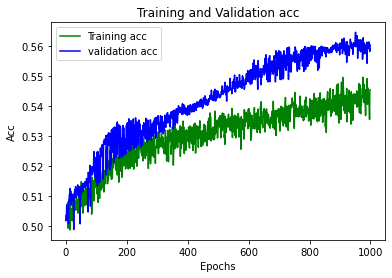

In [10]:
loss_train = history.history['auc']
loss_val = history.history['val_auc']
epochs = range(1000)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

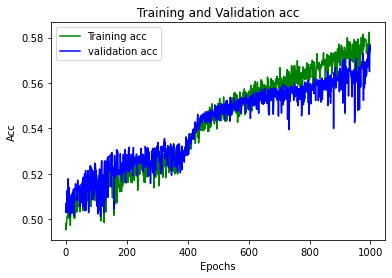

In [10]:
loss_train = history.history['auc']
loss_val = history.history['val_auc']
epochs = range(1000)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
loss_train = history.history['auc_1']
loss_val = history.history['val_auc_1']
epochs = range(1000)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()